In [27]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from itertools import combinations

## Pre-processing

In [2]:
W1_11 = pd.read_excel(r'C:\Users\17860\Desktop\thesis\data\Bio-ing reflectiemodules_dataR.xlsx',sheet_name="WZ1-WZ11")

In [3]:
W1_11.head()

,Code,# deelgenomen,# voldoende deelgenomen,# tijdig,# serieus,# geldige deelnames,Begindatum 1,Einddatum 1,Voortgang 1,Duur 1,...,Geldig 10,Begindatum 11,Einddatum 11,Voortgang 11,Duur 11,Afgelopen 11,Voldoende deelname 11,Tijdig 11,Serieus 11,Geldig 11
0,1,9,6,6,7,4,2021-02-18,2021-02-18,100,643,...,0,2021-04-29,2021-04-29,100,454,1,1,1,0,0
1,2,9,9,9,8,8,2021-02-18,2021-02-18,100,540,...,1,2021-04-28,2021-04-28,100,3020,1,1,1,1,1
2,3,5,4,4,2,2,2021-02-17,2021-02-17,100,490,...,0,NaT,NaT,0,0,0,0,0,0,0
3,4,7,6,1,7,1,2021-04-08,2021-04-08,57,2428,...,1,NaT,NaT,0,0,0,0,0,0,0
4,5,6,6,6,5,5,2021-02-25,2021-02-25,100,1041,...,1,2021-04-29,2021-04-29,55,673,0,1,1,1,1


In [4]:
# W5,W6 missing
# calculate the total login time (a similar indicator as '# serious')

W1_11['total_login_time'] = W1_11['Duur 1'] + W1_11['Duur 2'] + W1_11['Duur 3'] + W1_11['Duur 4'] + W1_11['Duur 7']+ W1_11['Duur 8'] + W1_11['Duur 9'] + W1_11['Duur 10']+ W1_11['Duur 11'] 
W1_11.head()

,Code,# deelgenomen,# voldoende deelgenomen,# tijdig,# serieus,# geldige deelnames,Begindatum 1,Einddatum 1,Voortgang 1,Duur 1,...,Begindatum 11,Einddatum 11,Voortgang 11,Duur 11,Afgelopen 11,Voldoende deelname 11,Tijdig 11,Serieus 11,Geldig 11,total_login_time
0,1,9,6,6,7,4,2021-02-18,2021-02-18,100,643,...,2021-04-29,2021-04-29,100,454,1,1,1,0,0,278859
1,2,9,9,9,8,8,2021-02-18,2021-02-18,100,540,...,2021-04-28,2021-04-28,100,3020,1,1,1,1,1,21488
2,3,5,4,4,2,2,2021-02-17,2021-02-17,100,490,...,NaT,NaT,0,0,0,0,0,0,0,5510
3,4,7,6,1,7,1,2021-04-08,2021-04-08,57,2428,...,NaT,NaT,0,0,0,0,0,0,0,38026
4,5,6,6,6,5,5,2021-02-25,2021-02-25,100,1041,...,2021-04-29,2021-04-29,55,673,0,1,1,1,1,4841


In [74]:
# calculate 'irregularity' (Jo, 2015)
for i in range(len(W1_11)):
    Timelist = []
    for time in ['Begindatum 1', 'Begindatum 2','Begindatum 3', 'Begindatum 4','Begindatum 7', 'Begindatum 8','Begindatum 9', 'Begindatum 10','Begindatum 11']:
        if not(pd.isnull(W1_11.loc[i,time])):
            Timelist.append(W1_11.loc[i,time])
    Timelist.sort()
    if len(Timelist)>1:
        deltaList =[]
        for j in range(len(Timelist)-1):
            deltaTemp = (Timelist[j+1]-Timelist[j]).days
            deltaList.append(deltaTemp)
        irregularity = np.var(deltaList)
    if len(Timelist)==1:
        irregularity = 0
    if len(Timelist)==0:
        irregularity = 9999
    W1_11.loc[i,'irregularity']=irregularity

0    184.687500
1     24.734375
2    310.000000
3     34.583333
4     47.040000
Name: irregularity, dtype: float64

In [75]:
Exam = pd.read_excel(r"C:\Users\17860\Desktop\thesis\data\Exam question angular momentum.xlsx", sheet_name = 'Data participants to exam')
merge_data = pd.merge(W1_11,Exam, on='Code',how='left')

In [77]:
# pre processing
merge_data = merge_data[['# deelgenomen', '# voldoende deelgenomen', '# tijdig',
       '# serieus', '# geldige deelnames',
       'Voortgang 1', 'Duur 1', 'Afgelopen 1', 'Voldoende deelname 1',
       'Tijdig 1', 'Serieus 1', 'Geldig 1',
       'Voortgang 2', 'Duur 2', 'Afgelopen 2', 'Voldoende deelname 2',
       'Tijdig 2', 'Serieus 2', 'Geldig 2', 
       'Voortgang 3', 'Duur 3', 'Afgelopen 3', 'Voldoende deelname 3',
       'Tijdig 3', 'Serieus 3', 'Geldig 3', 
       'Voortgang 4', 'Duur 4', 'Afgelopen 4', 'Voldoende deelname 4',
       'Tijdig 4', 'Serieus 4', 'Geldig 4', 
       'Voortgang 7', 'Duur 7', 'Afgelopen 7', 'Voldoende deelname 7',
       'Tijdig 7', 'Serieus 7', 'Geldig 7', 
       'Voortgang 8', 'Duur 8', 'Afgelopen 8', 'Voldoende deelname 8',
       'Tijdig 8', 'Serieus 8', 'Geldig 8', 
       'Voortgang 9', 'Duur 9', 'Afgelopen 9', 'Voldoende deelname 9',
       'Tijdig 9', 'Serieus 9', 'Geldig 9', 
       'Voortgang 10', 'Duur 10', 'Afgelopen 10', 'Voldoende deelname 10',
       'Tijdig 10', 'Serieus 10', 'Geldig 10',
       'Voortgang 11', 'Duur 11', 'Afgelopen 11', 'Voldoende deelname 11',
       'Tijdig 11', 'Serieus 11', 'Geldig 11', 'total_login_time',
       'irregularity', 
       'Conceptscore', 'Strategiescore', 'Resultaatscore',
       'Irrelevant', 'Blanco', 'Exam', 'ExamAngMom']]
merge_data.head()

,# deelgenomen,# voldoende deelgenomen,# tijdig,# serieus,# geldige deelnames,Voortgang 1,Duur 1,Afgelopen 1,Voldoende deelname 1,Tijdig 1,...,Geldig 11,total_login_time,irregularity,Conceptscore,Strategiescore,Resultaatscore,Irrelevant,Blanco,Exam,ExamAngMom
0,9,6,6,7,4,100,643,1,1,1,...,0,278859,184.687500,6.0,12.0,2.0,1.0,0.0,15.0,3.75
1,9,9,9,8,8,100,540,1,1,1,...,1,21488,24.734375,9.0,12.0,3.0,0.0,0.0,10.0,6.00
2,5,4,4,2,2,100,490,1,1,1,...,0,5510,310.000000,3.0,6.0,3.0,0.0,1.0,5.0,4.00
3,7,6,1,7,1,57,2428,0,1,0,...,0,38026,34.583333,2.0,14.0,5.0,2.0,0.0,7.0,3.00
4,6,6,6,5,5,100,1041,1,1,1,...,1,4841,47.040000,2.0,8.0,3.0,2.0,0.0,6.0,2.00


## Exam scores ~ metacognition

In [78]:
merge_data1=merge_data[['# deelgenomen', '# voldoende deelgenomen', '# tijdig',
       '# serieus', '# geldige deelnames', 'total_login_time',
       'irregularity', 'Exam']]

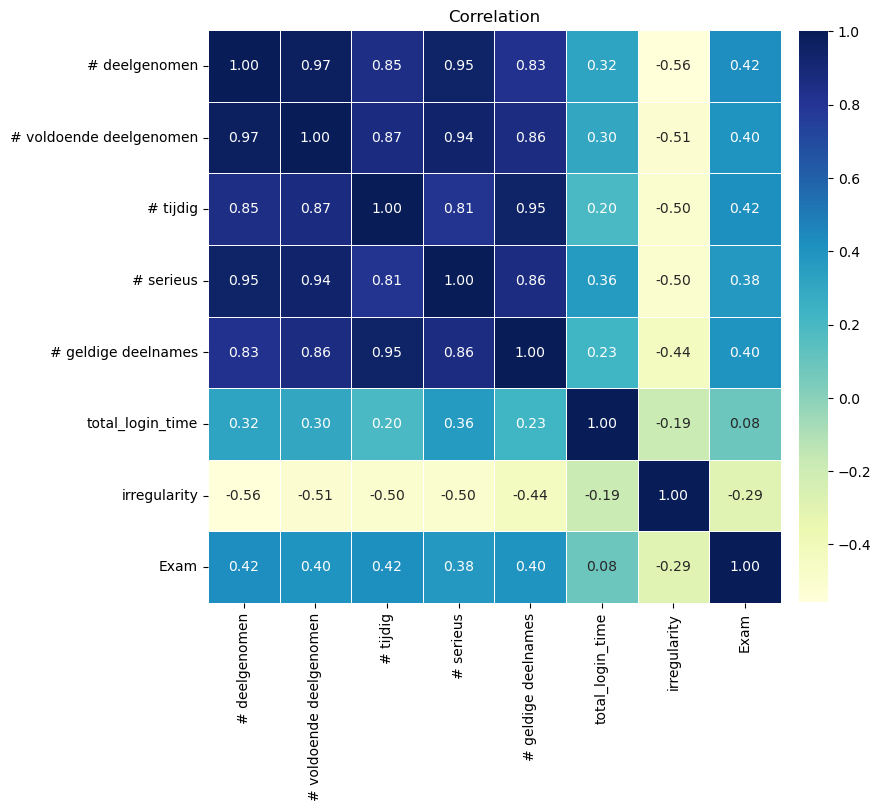

In [79]:
# correlation
datacor = merge_data1.corr()
plt.figure(figsize=(8,8))
ax = sns.heatmap(datacor, square=True, annot=True,fmt = ".2f",
                linewidths=.5,cmap='YlGnBu',
                cbar_kws={'fraction':0.046, 'pad':0.03})
ax.set_title('Correlation')
plt.show()

In [80]:
x = merge_data1[['# deelgenomen', '# voldoende deelgenomen', '# tijdig',
       '# serieus', '# geldige deelnames', 'total_login_time',
       'irregularity']]
y = merge_data1[['Exam']]
x = sm.add_constant(x)
model = sm.OLS(y,x,missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Exam   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     11.25
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           1.31e-12
Time:                        12:34:44   Log-Likelihood:                -786.89
No. Observations:                 298   AIC:                             1590.
Df Residuals:                     290   BIC:                             1619.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.5801      0.502     13.120      0.000       5.593       7.567
# deelgenomen               0.9850      0.338      2.913      0.004       0.319       1.651
# voldoende deelgenomen    -0.3763      0.264     -1.424      0.156      -0.897       0.144
# tijdig                   -0.1522      0.287     -0.530      0.596      -0.717       0.412
# serieus                  -0.5384      0.288     -1.869      0.063      -1.105       0.029
# geldige deelnames         0.6135      0.337      1.821      0.070      -0.049       1.276
total_login_time        -4.631e-08    2.8e-07     -0.165      0.869   -5.98e-07    5.05e-07
irregularity            -5.508e-05   7.35e-05     -0.749      0.454      -0.000    8.97e-05
==============================================================================
Omnibus:                        6.326   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.096
Skew:                           0.223   Prob(JB):                       0.0782
Kurtosis:                       2.540   Cond. No.                     2.39e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
# stepwise regression to forbid multicollinearity problems
variable = []
aic = []
bic = []
Cond = []
R_squared = []
y = merge_data1[['Exam']]
for ii in range(2,len(merge_data1.columns.values[0:-1])):
    var = list(combinations(merge_data1.columns.values[0:-1].tolist(),ii))
    for v in var:
        x = merge_data1[list(v)]
        model = sm.OLS(y,x,missing='drop')
        result = model.fit()
        bic.append(result.bic)
        aic.append(result.aic)
        variable.append(v)
        Cond.append(result.condition_number)
        R_squared.append(result.rsquared)
df = pd.DataFrame()
df['variable'] = variable
df['bic'] = bic
df['aic'] = aic
df['Cond'] = Cond
df['R_squared'] = R_squared

In [128]:
# Incomplete tables shown 
# The best two combination of variables is ('# deelgenomen', '# voldoende deelgenomen', '# tijdig')
# and ('# deelgenomen', '# voldoende deelgenomen', '# tijdig', '# serieus')

df.sort_values('bic', ascending=True)[df.Cond<300].head(8).to_excel(r'C:\Users\17860\Desktop\thesis\data\result1.xlsx')
df.sort_values('bic', ascending=True)[df.Cond<300].head(8)


C:\Users\17860\AppData\Local\Temp\ipykernel_7528\2393273648.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values('bic', ascending=True)[df.Cond<300].head(8).to_excel(r'C:\Users\17860\Desktop\thesis\data\result1.xlsx')
C:\Users\17860\AppData\Local\Temp\ipykernel_7528\2393273648.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values('bic', ascending=True)[df.Cond<300].head(8)


,variable,bic,aic,Cond,R_squared
21,"(# deelgenomen, # voldoende deelgenomen, # tij...",1806.055386,1794.964106,14.868806,0.743227
56,"(# deelgenomen, # voldoende deelgenomen, # tij...",1808.341132,1793.552758,17.101386,0.746150
0,"(# deelgenomen, # voldoende deelgenomen)",1808.656929,1801.262742,12.660025,0.735976
2,"(# deelgenomen, # serieus)",1808.785969,1801.391782,9.509831,0.735861
60,"(# deelgenomen, # voldoende deelgenomen, # ser...",1808.900099,1794.111725,18.303916,0.745673
57,"(# deelgenomen, # voldoende deelgenomen, # tij...",1810.498642,1795.710268,17.806141,0.744305
22,"(# deelgenomen, # voldoende deelgenomen, # ser...",1810.516510,1799.425229,15.215616,0.739354
26,"(# deelgenomen, # tijdig, # serieus)",1810.927098,1799.835818,11.302643,0.738995


In [129]:
# mutiple regression model
x = merge_data1[['# deelgenomen', '# voldoende deelgenomen', '# tijdig',
       '# serieus']]
y = merge_data1[['Exam']]
x = sm.add_constant(x)
model = sm.OLS(y,x,missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Exam   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     18.68
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           1.09e-13
Time:                        14:48:09   Log-Likelihood:                -788.84
No. Observations:                 298   AIC:                             1588.
Df Residuals:                     293   BIC:                             1606.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.2752      0.365     17.192      0.000       5.557       6.994
# deelgenomen               0.6636      0.257      2.579      0.010       0.157       1.170
# voldoende deelgenomen    -0.3006      0.256     -1.173      0.242      -0.805       0.204
# tijdig                    0.3337      0.122      2.733      0.007       0.093       0.574
# serieus                  -0.1724      0.186     -0.925      0.356      -0.539       0.195
==============================================================================
Omnibus:                        6.156   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                5.135
Skew:                           0.234   Prob(JB):                       0.0767
Kurtosis:                       2.558   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## AngMom scores ~ metacognition

In [136]:
# not choose all variables
merge_data2 = merge_data[['# deelgenomen', '# voldoende deelgenomen', '# tijdig',
       '# serieus', '# geldige deelnames',
        'Geldig 1',
        'Geldig 2', 
       'Geldig 3', 
        'Geldig 4', 
        'Geldig 7', 
        'Geldig 8', 
        'Geldig 9', 
       'Geldig 10',
        'Geldig 11', 'total_login_time',
       'irregularity', 
        'ExamAngMom']]
merge_data2 = (merge_data2-merge_data2.mean())/merge_data2.std()
merge_data2.head()

,# deelgenomen,# voldoende deelgenomen,# tijdig,# serieus,# geldige deelnames,Geldig 1,Geldig 2,Geldig 3,Geldig 4,Geldig 7,Geldig 8,Geldig 9,Geldig 10,Geldig 11,total_login_time,irregularity,ExamAngMom
0,1.361874,0.684592,0.906340,1.077486,0.508902,1.263172,-0.812577,1.347850,1.450969,1.589660,-0.631586,-0.55543,-0.456867,-0.425815,-0.021803,-0.449609,-0.360784
1,1.361874,1.588552,1.893103,1.388760,1.953270,-0.789483,1.227272,1.347850,1.450969,1.589660,1.578965,1.79546,2.182808,2.341984,-0.376479,-0.492077,0.506261
2,0.208361,0.081952,0.248498,-0.478883,-0.213282,-0.789483,1.227272,-0.739884,-0.687301,-0.627337,-0.631586,1.79546,-0.456867,-0.425815,-0.398497,-0.416338,-0.264445
3,0.785118,0.684592,-0.738265,1.077486,-0.574375,-0.789483,-0.812577,-0.739884,-0.687301,-0.627337,-0.631586,-0.55543,2.182808,-0.425815,-0.353688,-0.489462,-0.649799
4,0.496739,0.684592,0.906340,0.454939,0.869994,1.263172,-0.812577,-0.739884,-0.687301,-0.627337,1.578965,1.79546,2.182808,2.341984,-0.399419,-0.486155,-1.035152


In [144]:
# 多重共线性 逐步回归
variable = []
aic = []
bic = []
Cond = []
R_squared = []
y = merge_data2[['ExamAngMom']]
for ii in range(2,len(merge_data2.columns.values[0:-1])):
    var = list(combinations(merge_data2.columns.values[0:-1].tolist(),ii))
    for v in var:
        x = merge_data2[list(v)]
        model = sm.OLS(y,x,missing='drop')
        result = model.fit()
        bic.append(result.bic)
        aic.append(result.aic)
        variable.append(v)
        Cond.append(result.condition_number)
        R_squared.append(result.rsquared)
df = pd.DataFrame()
df['variable'] = variable
df['bic'] = bic
df['aic'] = aic
df['Cond'] = Cond
df['R_squared'] = R_squared

In [145]:
df.sort_values('bic', ascending=True)[df.Cond<300].head(20)

C:\Users\17860\AppData\Local\Temp\ipykernel_7528\236383638.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df.sort_values('bic', ascending=True)[df.Cond<300].head(20)


,variable,bic,aic,Cond,R_squared
11,"(# deelgenomen, Geldig 10)",812.938153,805.543966,1.710502,0.134779
12,"(# deelgenomen, Geldig 11)",813.830221,806.436034,1.736405,0.132186
1,"(# deelgenomen, # tijdig)",815.078417,807.684230,3.246644,0.128543
5,"(# deelgenomen, Geldig 2)",815.716688,808.322501,1.865786,0.126674
3,"(# deelgenomen, # geldige deelnames)",815.798696,808.404509,3.017766,0.126434
14,"(# deelgenomen, irregularity)",816.025155,808.630968,1.972122,0.125770
7,"(# deelgenomen, Geldig 4)",816.589851,809.195664,1.954220,0.124112
8,"(# deelgenomen, Geldig 7)",816.787885,809.393698,2.046727,0.123530
10,"(# deelgenomen, Geldig 9)",816.871645,809.477459,1.943772,0.123283
0,"(# deelgenomen, # voldoende deelgenomen)",816.895358,809.501171,7.700726,0.123213


In [147]:
# mutiple regression model
x = merge_data2[['# deelgenomen', 'Geldig 10','Geldig 11', '# tijdig']]
y = merge_data2[['ExamAngMom']]
x = sm.add_constant(x)
model = sm.OLS(y,x,missing='drop')
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             ExamAngMom   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     12.30
Date:                Wed, 15 Feb 2023   Prob (F-statistic):           2.96e-09
Time:                        11:20:30   Log-Likelihood:                -399.22
No. Observations:                 298   AIC:                             808.4
Df Residuals:                     293   BIC:                             826.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0744      0.055     -1.346      0.179      -0.183       0.034
# deelgenomen     0.2568      0.097      2.636      0.009       0.065       0.449
Geldig 10         0.0794      0.067      1.187      0.236      -0.052       0.211
Geldig 11         0.0590      0.065      0.910      0.364      -0.069       0.187
# tijdig          0.0426      0.106      0.403      0.687      -0.165       0.250
==============================================================================
Omnibus:                       17.194   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                6.947
Skew:                          -0.002   Prob(JB):                       0.0310
Kurtosis:                       2.252   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""